# pyBumpHunter Example

Simple notebook for testing the pyBumpHunter.py package.

We will use histograms ranging between 0 and 20 with 60 even bins.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyBumpHunter as BH
from datetime import datetime  ## Used to compute the execution time
import uproot as upr  ## Used to read data from a root file

In [2]:
#import xgboost as xgb
#import matplotlib.pyplot as plt
#import uproot as uproot
import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
import shutil
from array import array
import math
from tqdm import tqdm
import os

#print(xgb.__version__)

import ROOT
print(ROOT.gROOT.GetVersion())
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetLegendBorderSize(0)
ROOT.gStyle.SetLegendTextSize(0.035)
ROOT.gStyle.SetLegendFont(62)
ROOT.gStyle.SetLabelFont(62)

import analysisfunction

6.32.06
6.32.06


In [3]:
plot_folder = "test_bumphunter"

if not os.path.exists('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder):
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder)
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/plots_2d')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/python_plots')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/data')
    

In [4]:
#set base ROOT color numbers (from TAttFill class ref) for use with matplotlib
kWhite  = 0   
kBlack  = 1
kGray    = 920
kRed    = 632
kGreen  = 416
kBlue   = 600
kYellow = 400
kMagenta = 616
kCyan   = 432
kOrange = 800
kSpring = 820
kTeal   = 840
kAzure   =  860
kViolet = 880
kPink   = 900

#set default color and hatching
colors = [ROOT.gROOT.GetColor(kRed+2).AsHexString(), ROOT.gROOT.GetColor(kOrange+3).AsHexString(),
          ROOT.gROOT.GetColor(kGray).AsHexString(), ROOT.gROOT.GetColor(kOrange+1).AsHexString(),
          ROOT.gROOT.GetColor(38).AsHexString(), ROOT.gROOT.GetColor(30).AsHexString(),
          ROOT.gROOT.GetColor(kOrange+1).AsHexString(), ROOT.gROOT.GetColor(kAzure+6).AsHexString(),
          ROOT.gROOT.GetColor(kGreen+1).AsHexString(), ROOT.gROOT.GetColor(kPink+5).AsHexString(),
          ROOT.gROOT.GetColor(kPink-6).AsHexString(), ROOT.gROOT.GetColor(kPink-8).AsHexString(),
          ROOT.gROOT.GetColor(kPink-7).AsHexString(), ROOT.gROOT.GetColor(kPink).AsHexString()]

hatches = ['\\\\','\\\\','\\\\','\\\\',None,None,None,None,None,None,None,None,None,]

#default = do not plot y axis as log, and do not include eff and pur in title
plotlog = False
showeffpur = False

#default legend position (upper right corner)
legx1 = 0.45
legy1 = 0.55
legx2 = 0.85
legy2 = 0.85

#POT information
run1dataPOT = 0.0
run2dataPOT = 0.0
run3dataPOT = 0.0

run1dataPOT = 1.42549e+20
run2dataPOT = 2.54086e+20
run3dataPOT = 2.37673e+20

run1frac = 1.42549
run2frac = 2.54086
run3frac = 2.37673

run1ExtBnbPOT = 2.02672e+20 #6.67349e+19
run2ExtBnbPOT = 3.60832e+20
run3ExtBnbPOT = 5.19263e+20

#run1dataSpills =  6.9301e+06
#run3dataSpills = 0.0
#run1BnbPOT = 7.87981e+20   #4.14781e+20#1.16272e20
#run3BnbPOT = 6.28739e+20
#run1ExtBnbSpills = 1.488e+07
#run3ExtBnbSpills = 8.81379e+06
#run1DirtPOT = 3.56173e+20   #1.51589e+20
#run3DirtPOT = 3.59228e+20

Numu_Cut = 0.4 #0000000000000036 #0.10000000000000009  
Other_Cut = 0.2 #0000000000000018 #-0.3999999999999999  
NC_Pi0_Cut = -0.05 #999999999999982 #-0.3999999999999999  
Nue_Cut = -1.0 #-3.0

#Numu_Cut = 0.1 #-3.0 #0.40000000000000036 #0.10000000000000009  
#Other_Cut = -0.4 #0.20000000000000018 #-0.3999999999999999  
#NC_Pi0_Cut = -0.4 #-0.04999999999999982 #-0.3999999999999999  
#Nue_Cut = -3.0 #-1.0 #-3.0  

#files
nu_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run1_sp.root"       
nu_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run2_sp.root"      
nu_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run3_sp_1.root"     
DIRT_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run1_sp.root"              
DIRT_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run2_sp.root"              
DIRT_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run3_sp.root"              
EXTBNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run1_sp.root"        
EXTBNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_D2_run2_sp.root"         
EXTBNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run3_sp.root"         
BNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run1_full.root"         
BNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run2_full.root"               
BNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run3_full.root"               
sp_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run1_cv.root"
sp_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run2_cv.root"
sp_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run3_cv.root"
ncpi0_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run1_sp.root"
ncpi0_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run2_sp.root"
ncpi0_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run3_sp.root"
lee_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_LEE_1g0p_run1_half.root"

nu_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_overlay_reco2_hist_flagbugfix.root"
DIRT_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_dirt_may8_reco2_hist_62280564_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_dirt_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_dirt_reco2_hist.root"
EXTBNB_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_off_may8_reco2_hist_goodruns_62280841_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_beam_off_reco2_hist_goodruns_62221096_snapshot_goodruns.root"#MCC9.10_Test_Samples_v10_04_07_03_Run4b_super_unified_reco2_BNB_beam_off_reco2_hist.root"
BNB_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_on_may8_reco2_hist_goodruns_62280934_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_beam_on_reco2_hist_goodruns_62221062_snapshot_goodruns.root"#MCC9.10_Test_Samples_v10_04_07_03_Run4b_super_unified_reco2_BNB_beam_on_reco2_hist.root"
nue_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nue_overlay_may8_reco2_hist_62280525_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nue_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nue_overlay_reco2_hist.root"
ncpi0_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_NC_pi0_overlay_may8_reco2_hist_62280465_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root"


#BNB_1 = ncpi0_overlay_1
#BNB_2 = ncpi0_overlay_2
#BNB_3 = ncpi0_overlay_3

In [5]:
##FOR USING AN OVERLAY AS DATA
run1dataPOT = analysisfunction.GetPOT(ncpi0_overlay_1)
run2dataPOT = analysisfunction.GetPOT(ncpi0_overlay_2)
run3dataPOT = analysisfunction.GetPOT(ncpi0_overlay_3)

1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [6]:
pot_vars = [
        ("run1BnbPOT", nu_overlay_1),
        ("run2BnbPOT", nu_overlay_2),
        ("run3BnbPOT", nu_overlay_3),
        ("run1DirtPOT", DIRT_1),
        ("run2DirtPOT", DIRT_2),
        ("run3DirtPOT", DIRT_3),
        ("run1SPPOT", sp_overlay_1),
        ("run2SPPOT", sp_overlay_2),
        ("run3SPPOT", sp_overlay_3),
        ("run1NCPi0POT", ncpi0_overlay_1),
        ("run2NCPi0POT", ncpi0_overlay_2),
        ("run3NCPi0POT", ncpi0_overlay_3)
    ]

for var_name, file_name in pot_vars:
    globals()[var_name] = analysisfunction.GetPOT(file_name)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


# Load input files


In [7]:


#all_df_in_bdt_sp_overlay, all_df_in_pfeval_sp_overlay, all_df_in_kine_sp_overlay, all_df_in_eval_sp_overlay = analysisfunction.LoadTreesData(sp_overlay_1, sp_overlay_2, sp_overlay_3)


In [8]:
all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over = analysisfunction.LoadTreesTruth(nu_overlay_1, nu_overlay_2, nu_overlay_3)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over

In [9]:
all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt = analysisfunction.LoadTreesTruth(DIRT_1, DIRT_2, DIRT_3)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt

In [10]:
all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb = analysisfunction.LoadTreesData(EXTBNB_1, EXTBNB_2, EXTBNB_3)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb

In [11]:
#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(BNB_1, BNB_2, BNB_3)
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb

In [12]:
all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0 = analysisfunction.LoadTreesTruth(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0

In [13]:
all_df = pd.concat([all_df_in_bdt_over, all_df_in_bdt_dirt, all_df_in_bdt_ext, all_df_in_bdt_data], ignore_index=True, sort=False)

In [14]:
del all_df_in_bdt_over
del all_df_in_bdt_dirt
del all_df_in_bdt_ext
del all_df_in_bdt_data

In [15]:
num_evts = all_df.shape[0]

y = all_df["true_event_type"].to_numpy()

w = []
w = analysisfunction.CalculateWeights(all_df, run1dataPOT, run2dataPOT, run3dataPOT, run1ExtBnbPOT, run2ExtBnbPOT, run3ExtBnbPOT, pot_vars)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [16]:
weights_sig, weights_bkg, weights_data = analysisfunction.GetVariableArrays(all_df, "weights", "weights", [])
    
        
num_sig_tot=np.sum(weights_sig) #/ 0.83

# Make data, bkg, sig

In [17]:
#make input arrays for bump hunter
hist_input = False

sig_no, bkg, data = analysisfunction.GetVariableArrays(all_df, "kine_pio_mass","pi0_mass", [], "ncpi0_sideband")

sig_scale = 1.5
sig_raw, bkg_sig, data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "kine_pio_mass","pi0_mass", [-3], "ncpi0_sideband")
#w_sig_in, w_bkg_sig, w_data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "weights", "w", [-3], "ncpi0_sideband")

sig = [x * sig_scale for x in sig_raw]

w_sig, w_bkg, w_data = analysisfunction.GetVariableArrays(all_df, "weights", "w", [], "ncpi0_sideband")

sig = np.array(sig)
bkg = np.array(bkg)
data = np.array(data)

In [18]:
print(sig)

[149.8176   141.2795   319.62698  ...  13.274189 275.53607  148.0041  ]


## For hist inputs

hist_input = True

#Open the file
File = upr.open('/Users/eyandel/Documents/MicroBooNE/bump/data/Xp_1500_data_hists.root')
File.items()

#Background
bkg = File['bkg'].values()

#Data
data = File['data'].values()

#Signal
sig = File['sig'].values()

In [19]:
# Position of the bump in the data
#Lth = 5.5

# Range for the histogram
rang = [0,1000]
binnum = 50

bkg.shape

(15470,)

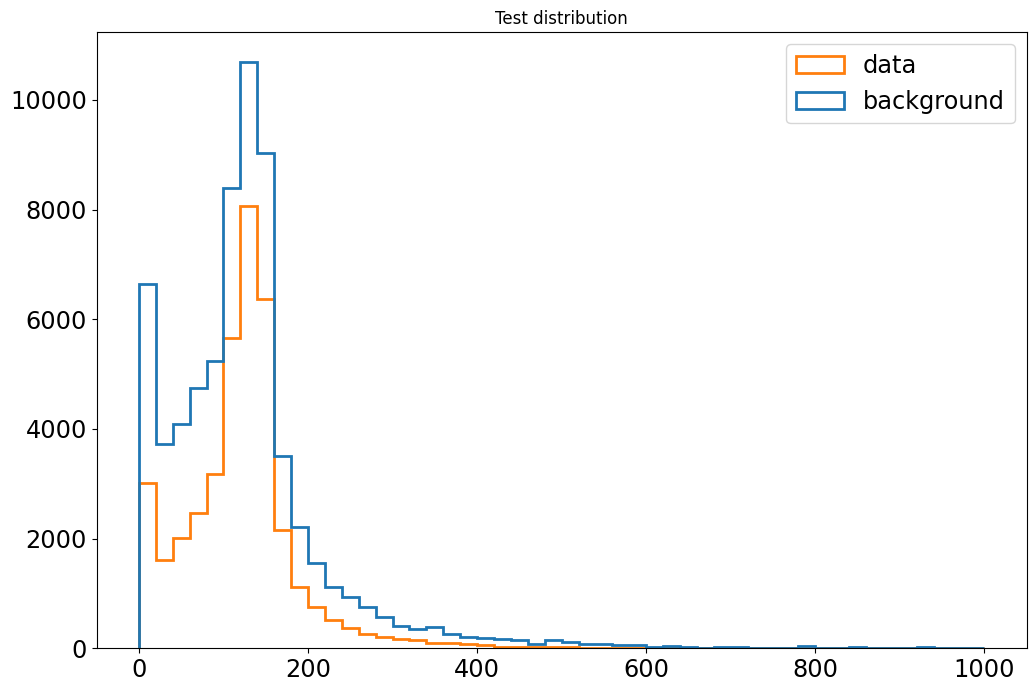

In [20]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, data, yerr=np.sqrt(data), fmt='o', label='data', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    plt.hist(
        [bkg, data],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "data"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()

## Create a BumpHunter1D class instance.

The BumpHunte1Dr class provides all the methods required to "bump hunt" in ease.

All the parameters and results are also stored in this object.

In [21]:
hunter = BH.BumpHunter1D(
    rang=rang,
    width_min=1,
    width_max=10,
    width_step=1,
    scan_step=1,
    npe=400000,
    nworker=1,
    seed=666,
    bins=binnum,
    weights=w_bkg,
)

## Call the BumpScan Method

The function will scan the data distribution using variable-width window sizes (between width_min and width_max) and calculate the p-value of data with respect to the background for each window. The minimum p-value obtained from all windows is the local p-value.

To cope with the look-elsewhere effect a global p-value is calculated using a two-step procedure:
- the distribution of possible p-values is determined from background-only pseudo-experiments (npe parameter)
- the p-value found in data is compared to the background-only p-value distribution to calculate the global p-value

In [22]:
print('####bump_scan call####')
begin = datetime.now()
hunter.bump_scan(data, bkg, is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####bump_scan call####
Generating histograms
10 values of width will be tested
SCAN
Global p-value : 1.0000  (400000 / 400000)
Significance = 0

time=0:05:27.099646



## Print results of BH scan

Print information on more significant window ("bump"): location, width, excess over background events, global p-value and global significance.

In [23]:
print(hunter.bump_info(data))
#print(f'   mean (true) = {Lth}')

Bump edges : [0, 20]  (loc=0, width=1)
Bump mean | width : 10 | 20
Evaluated number of signal events : -3.64e+03
Local p-value | test statistic : 1 | -0
Local significance : -inf
Global p-value : 1
Global significance : 0


## Tomography plot

This figure shows the p-value in each of the windows used to scan the data distribution.

In [24]:
#hunter.plot_tomography(data)

## Show most significant window

Window with the lowest p-value obtained from the data scans.

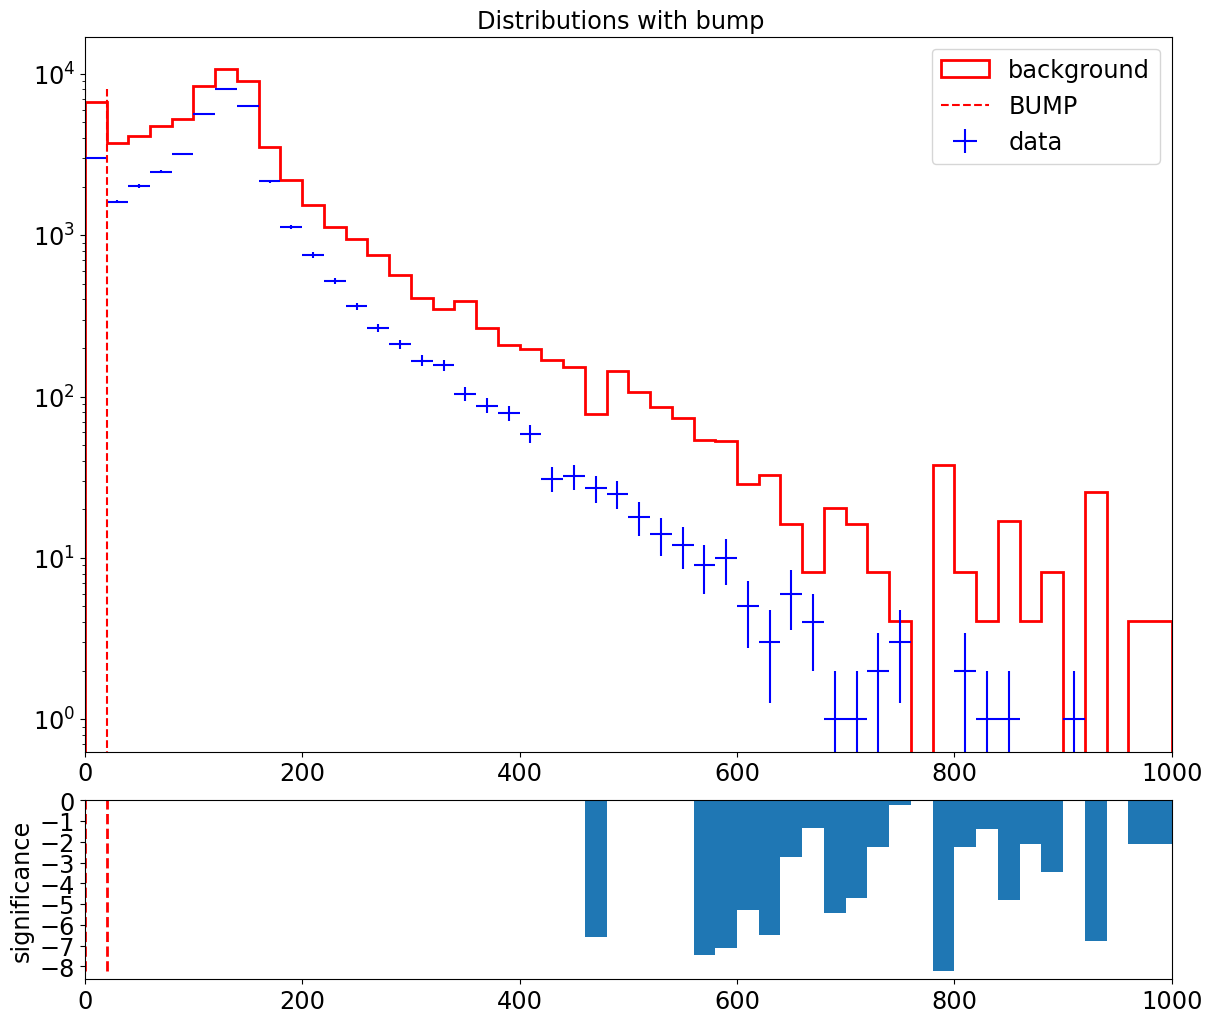

In [25]:
hunter.plot_bump(data, bkg, is_hist=hist_input)

# Global p-value

This figure shows the test statistics (log(p-value)) obtained from background-only toys and the p-value obtained from data. The global p-value is equal to the fraction of background-only experiments whch have a higher test statistics than for the data (i.e this is the p-value of p-values).

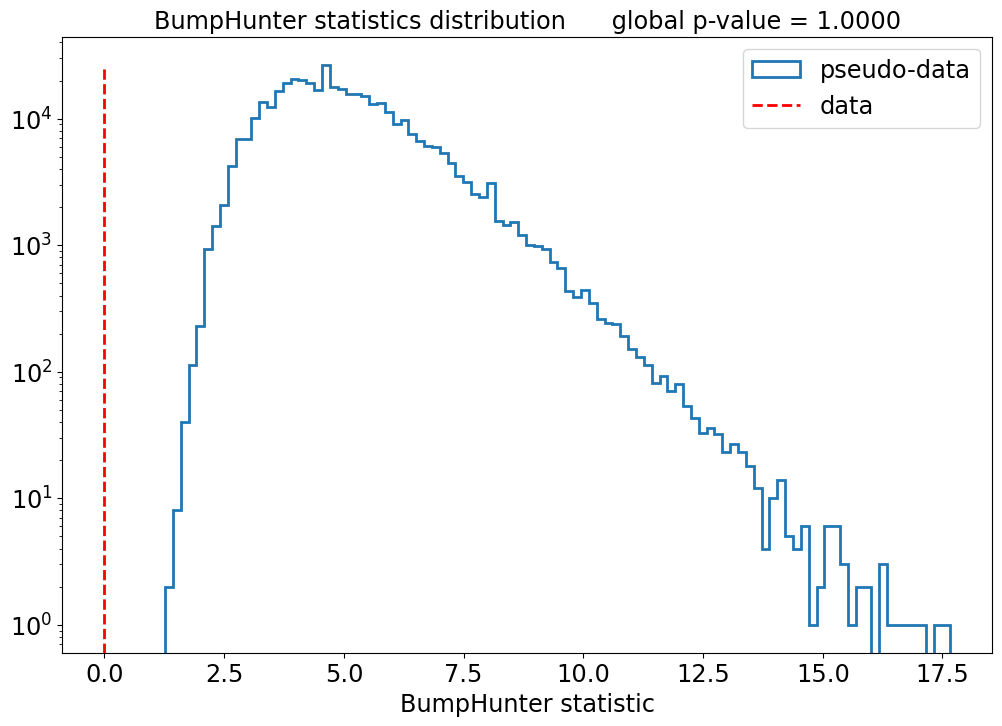

In [26]:
hunter.plot_stat(show_Pval=True)

## Signal injection

Inject signal in data until a 5 sigma excess is found. 

In [27]:
len(sig)

38642

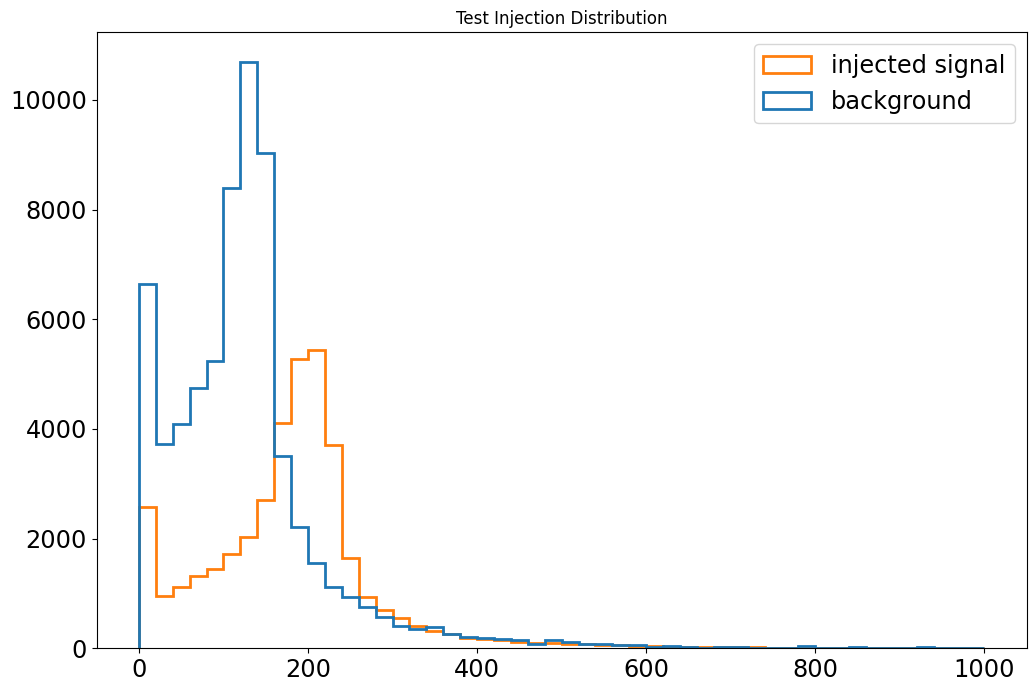

In [28]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test Injection Distribution")
    plt.hist(
        [bkg, sig],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "injected signal"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

In [29]:
# We have to set additionnal parameters specific to the signal injection.
# All the parameters defined previously are kept.
hunter.sigma_limit = 4.5
hunter.str_min = 0.01 # if str_scale='log', the real starting value is 10**str_min
hunter.str_step = 0.005
hunter.str_scale = 'lin' #'log'
hunter.signal_exp = len(sig) #150 # Correspond the the real number of signal events generated when making the data
hunter.npe_inject = 2000

print('####signal_inject call####')
begin = datetime.now()
hunter.signal_inject(sig,bkg,is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0992  (39666 / 400000)   0.4034  (161377)   0.0079  (3167)
Significance = 1.28632 (0.24445  2.41270)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0069  (2779 / 400000)   0.0898  (35939)   0.0002  (72)
Significance = 2.45997 (1.34169  3.56779)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0001  (41 / 400000)   0.0049  (1968)   0.0000  (0)
Significance = 3.71277 (2.58140  4.56479)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0001  (34)   0.0000  (0)
Significance = 4.56479 (3.75987  4.56479)

REACHE

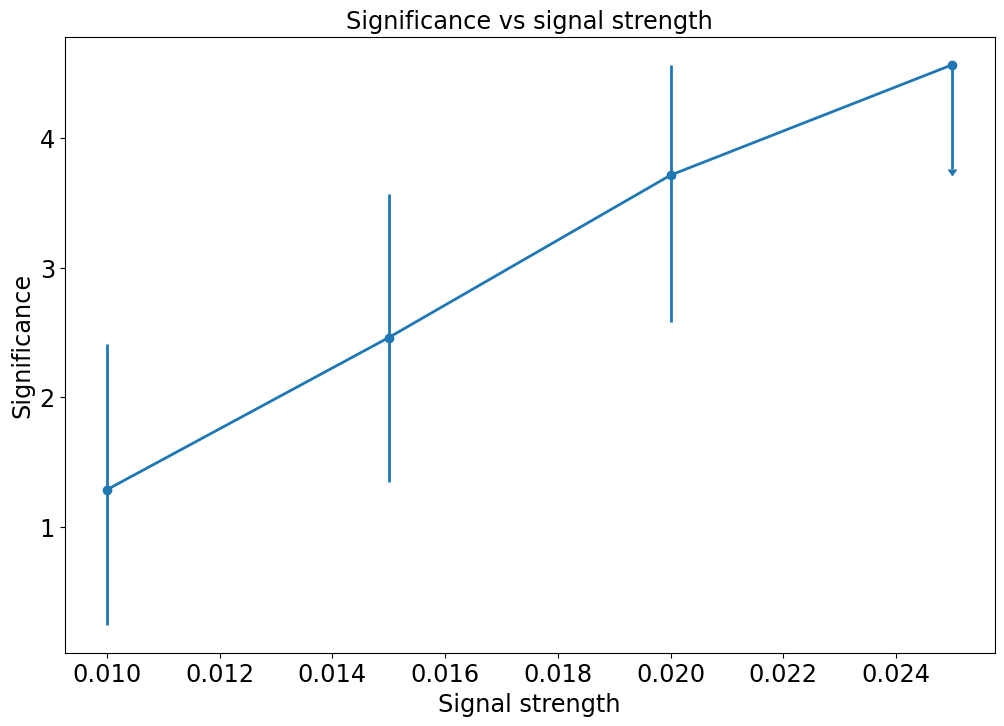

In [30]:
# Get the injection plot (with linear and log scale axis)
hunter.plot_inject()
hunter.plot_inject(filename = '/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_sig_'+str(sig_scale)+'.png')

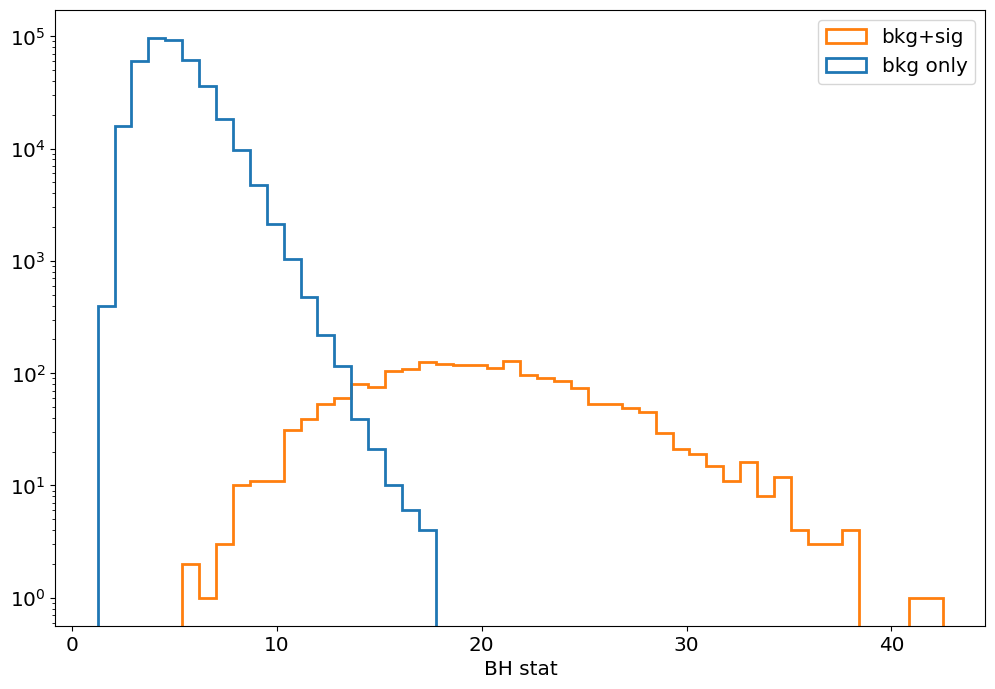

In [31]:
F = plt.figure(figsize=(12,8))
plt.hist(
    [hunter.t_ar[:hunter.npe],hunter.t_ar[hunter.npe:]],
    bins=50,
    histtype='step',
    lw=2,
    label=['bkg only', 'bkg+sig']
)
plt.legend(fontsize='x-large')
plt.xlabel('BH stat', size='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.yscale('log')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/BHstat_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

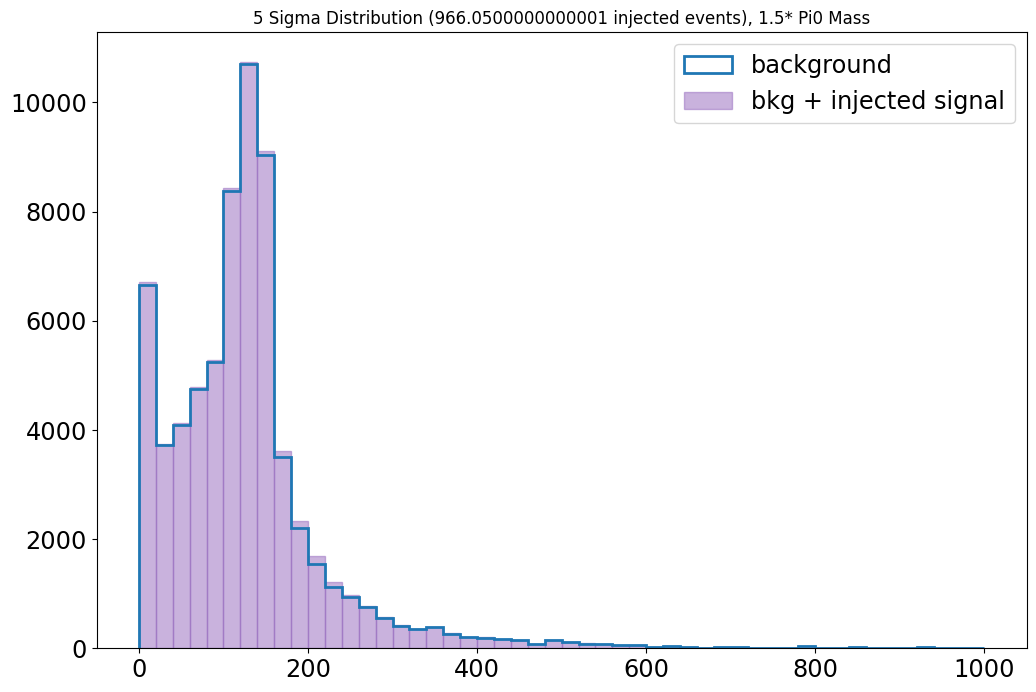

In [ ]:
# Plot the signal injected distribution
F = plt.figure(figsize=(12,8))
plt.title("4.5 Sigma Distribution (" + str(hunter.signal_min) + " injected events), " + str(sig_scale) + "* Pi0 Mass")
# Since bkg and data are already arrays of bin contents, use bar plot to show them
bin_edges = np.linspace(rang[0], rang[1], len(hunter.data_inject)+1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.bar(bin_centers, hunter.data_inject, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='bkg + injected signal', color='C4', edgecolor='C4')
#plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
plt.hist(
        [bkg],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background"],
        linewidth=2,
        weights=[w_bkg],
    )
plt.legend(fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

# Loop over different scalings

Scaling Mass by 0.2


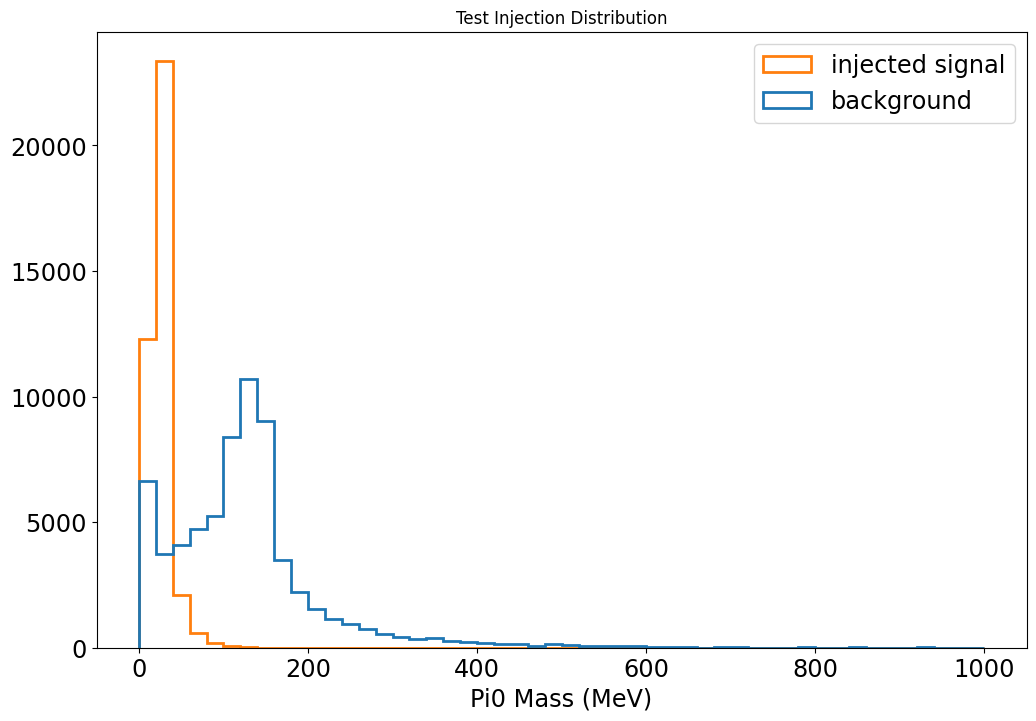

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0034  (1344 / 400000)   0.0647  (25884)   0.0001  (32)
Significance = 2.71041 (1.51639  3.77501)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0001  (48)   0.0000  (0)
Significance = 4.56479 (3.67270  4.56479)

REACHED SIGMA LIMIT
   Number of signal event injected : 579.63
   Signal strength : 0.0150

time=0:05:31.159203



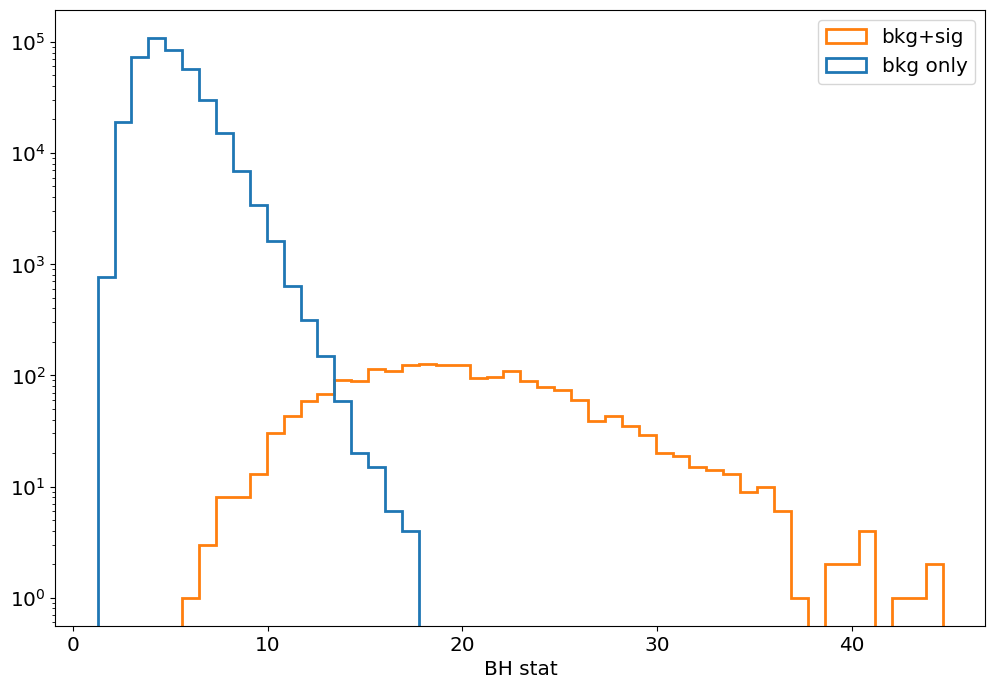

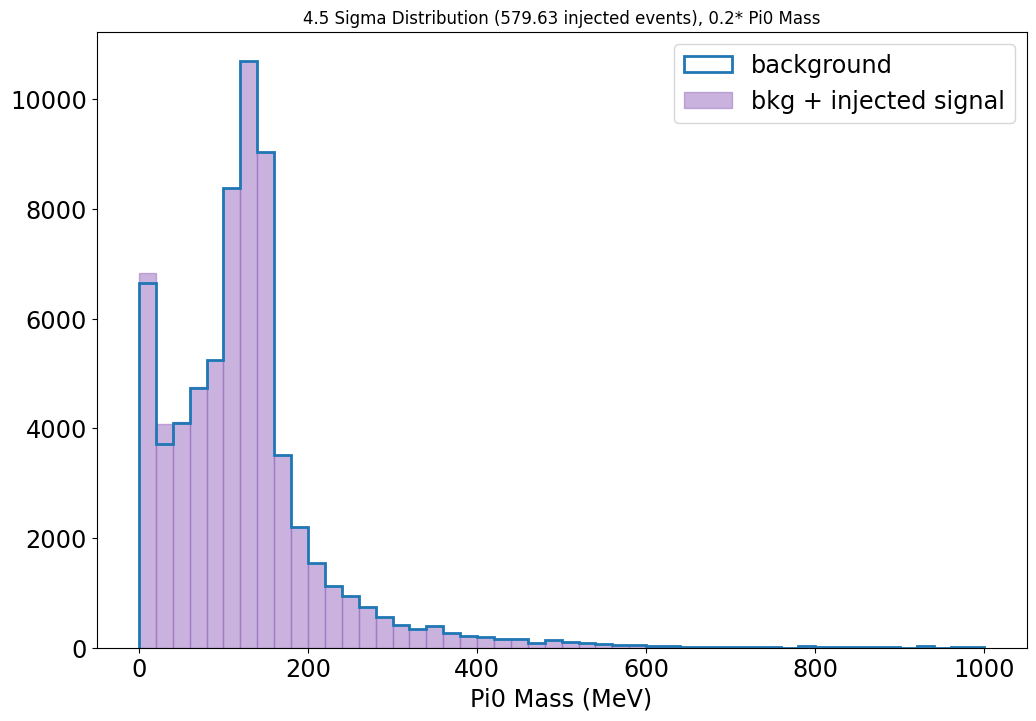

Scaling Mass by 0.4


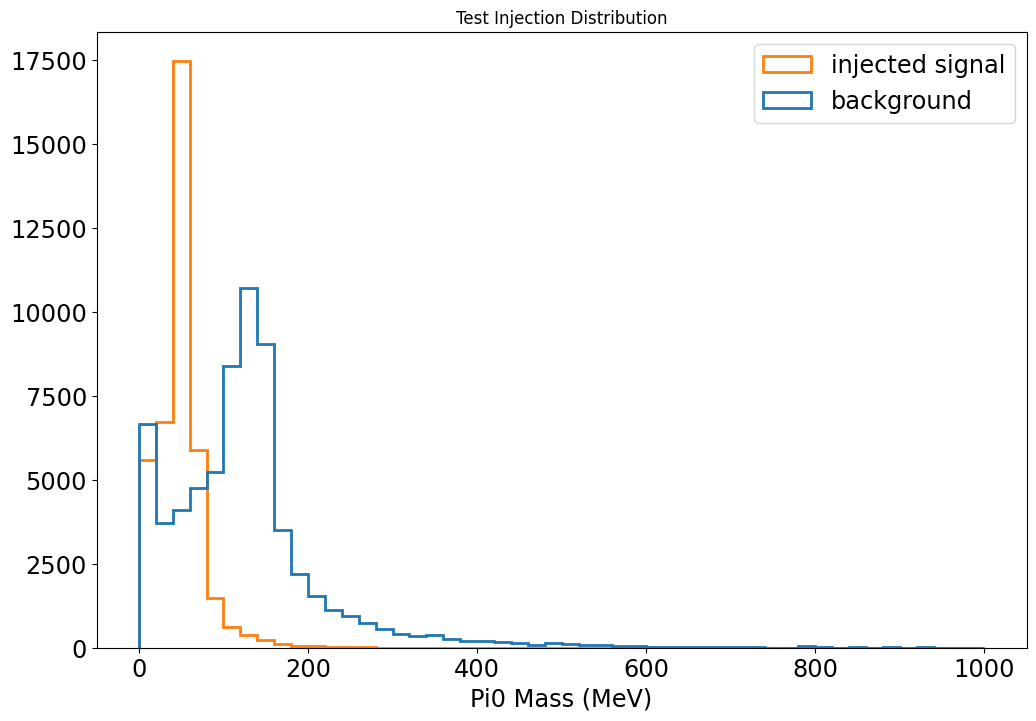

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0409  (16361 / 400000)   0.2925  (116999)   0.0017  (686)
Significance = 1.74031 (0.54610  2.92632)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0004  (146 / 400000)   0.0143  (5709)   0.0000  (0)
Significance = 3.37806 (2.18971  4.56479)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0001  (24)   0.0000  (0)
Significance = 4.56479 (3.84613  4.56479)

REACHED SIGMA LIMIT
   Number of signal event injected : 772.84
   Signal strength : 0.0200

time=0:05:34.872502



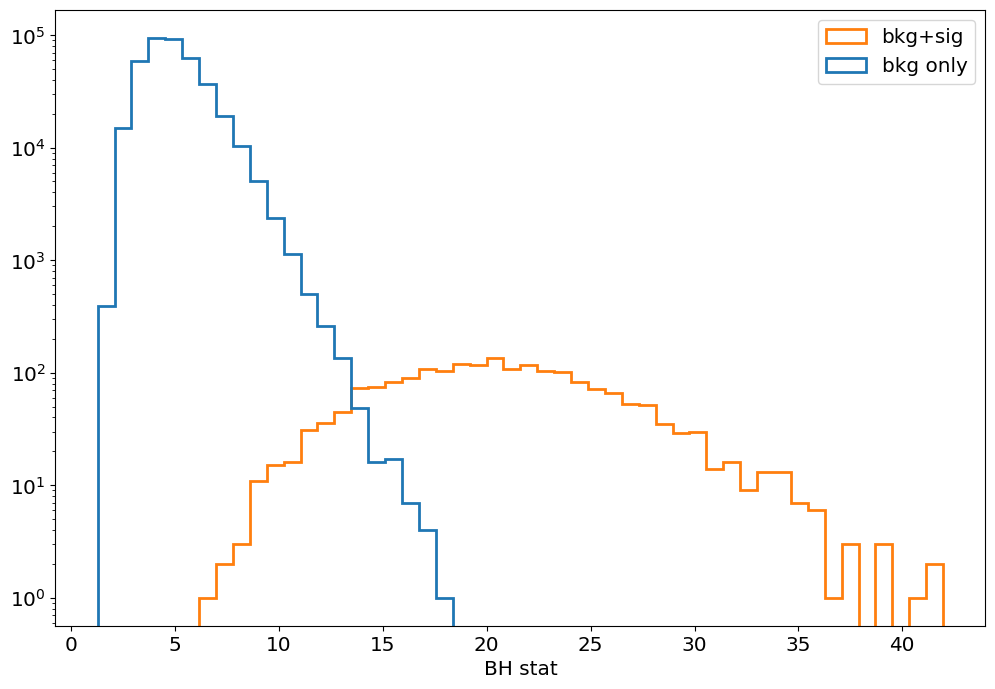

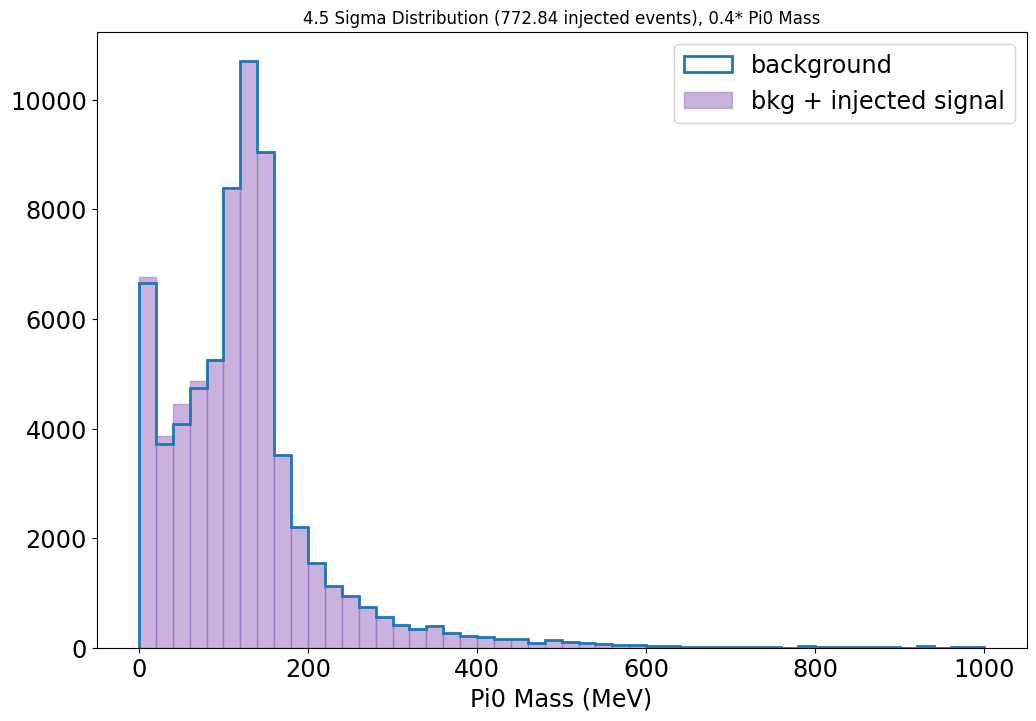

Scaling Mass by 0.6000000000000001


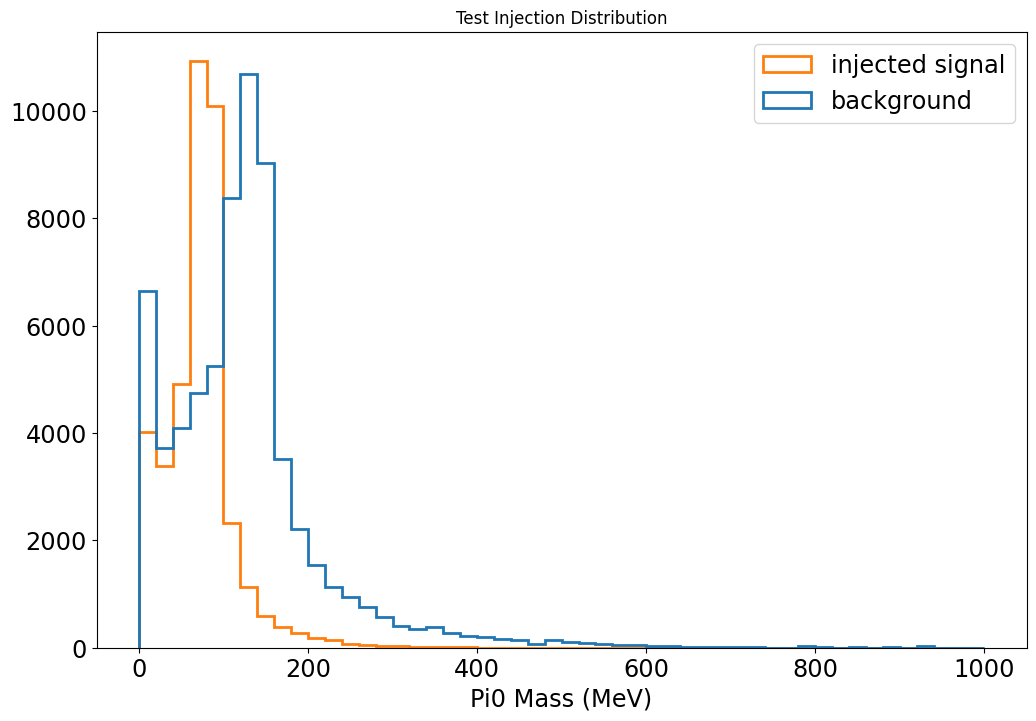

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.1247  (49898 / 400000)   0.4790  (191590)   0.0112  (4487)
Significance = 1.15159 (0.05273  2.28292)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0094  (3746 / 400000)   0.1190  (47584)   0.0002  (84)
Significance = 2.35086 (1.18020  3.52719)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0001  (48 / 400000)   0.0055  (2212)   0.0000  (0)
Significance = 3.67270 (2.54080  4.56479)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0001  (41)   0.0000  (0)
Significance = 4.56479 (3.71277  4.56479)

REACHE

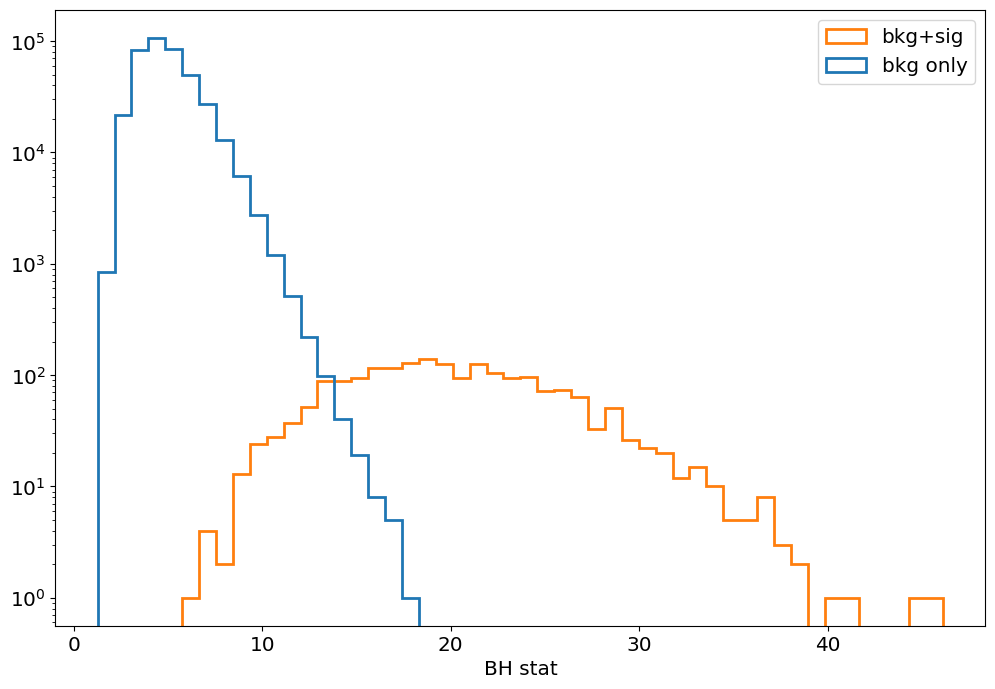

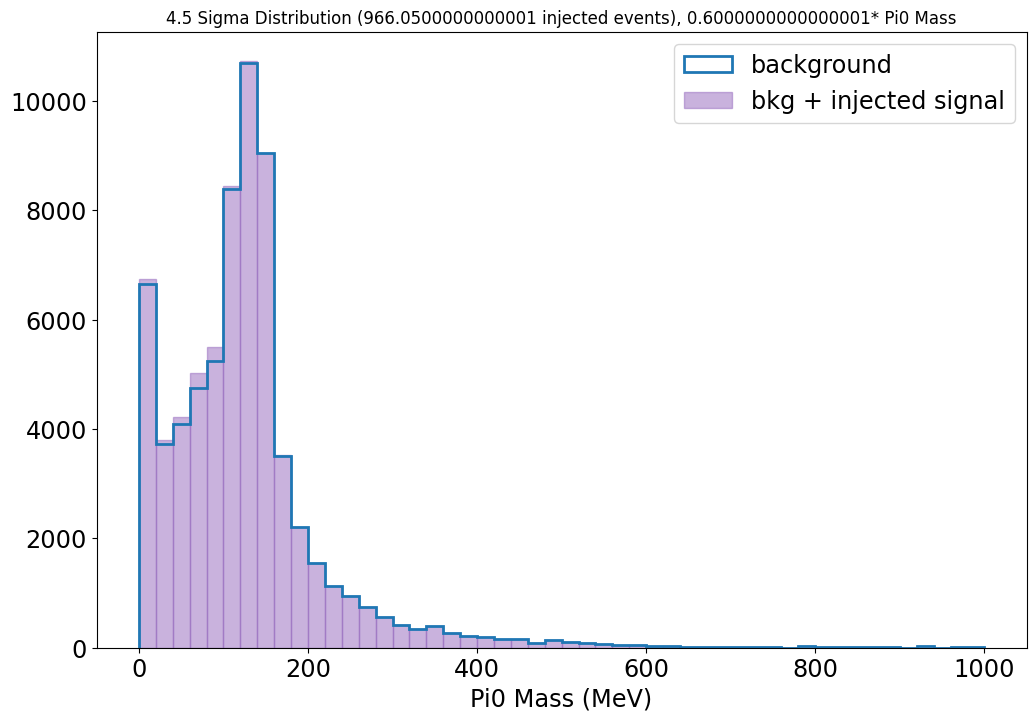

Scaling Mass by 0.8


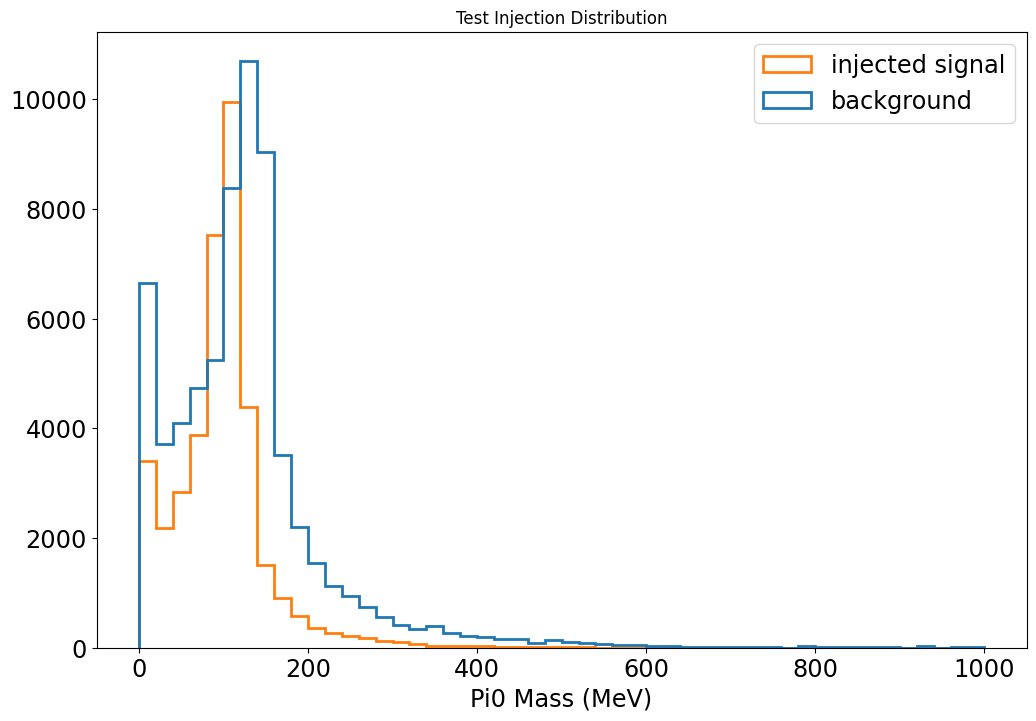

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.2125  (84986 / 400000)   0.6072  (242899)   0.0297  (11867)
Significance = 0.79790 (-0.27215  1.88570)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0572  (22879 / 400000)   0.3490  (139588)   0.0030  (1214)
Significance = 1.57874 (0.38810  2.74398)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0058  (2324 / 400000)   0.0827  (33085)   0.0001  (41)
Significance = 2.52348 (1.38705  3.71277)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0003  (104 / 400000)   0.0105  (4213)   0.0000  (0)
Significance = 3.47024 (2.30682  4.

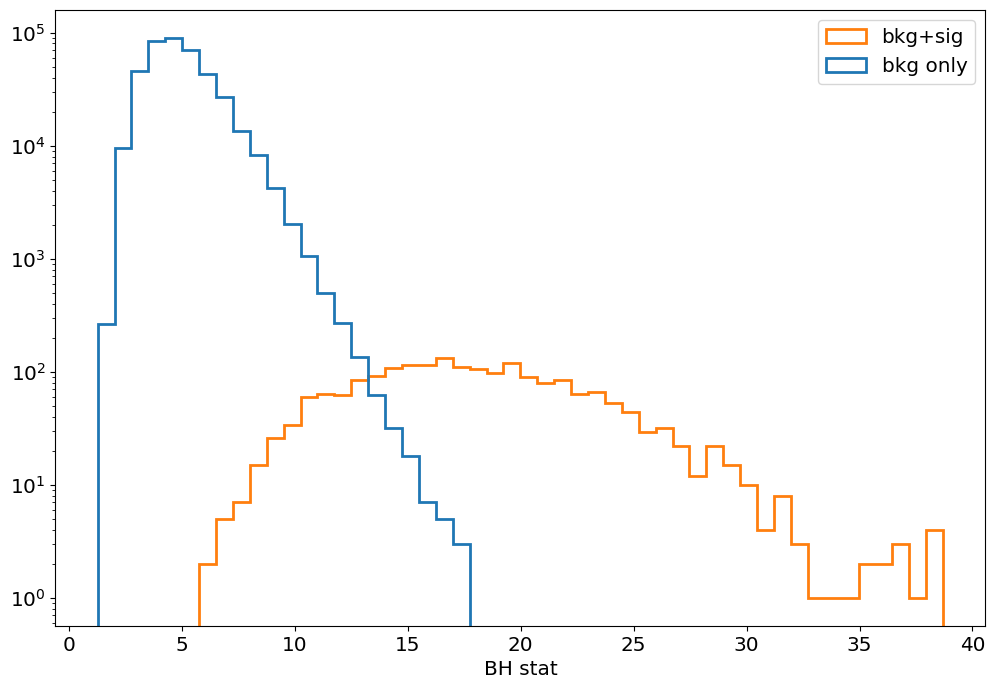

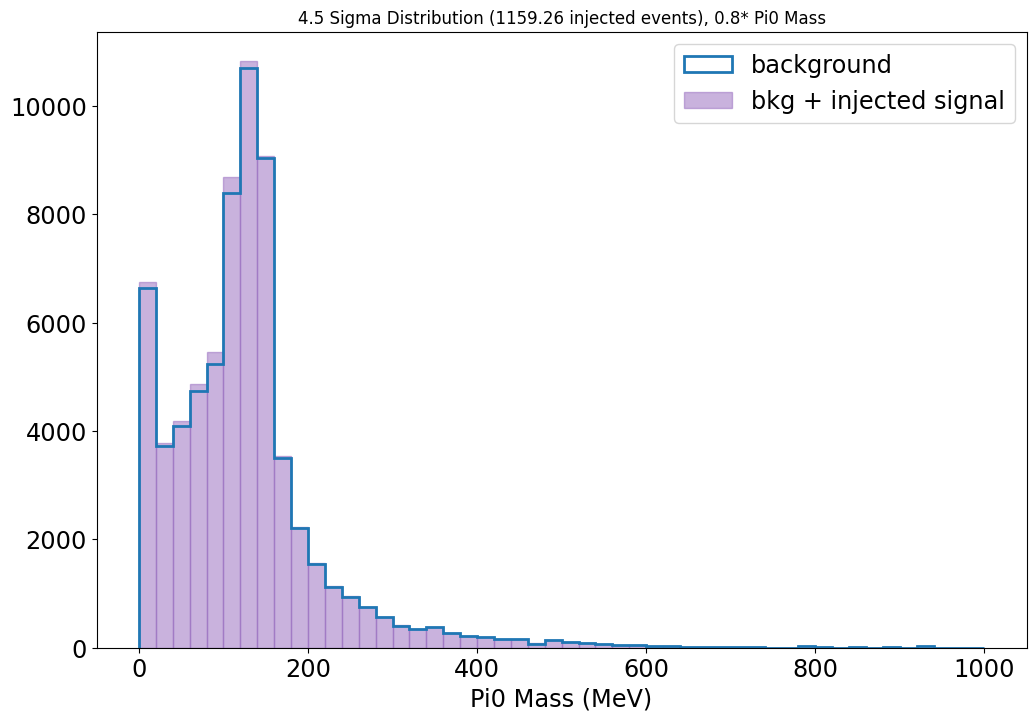

Scaling Mass by 1.0


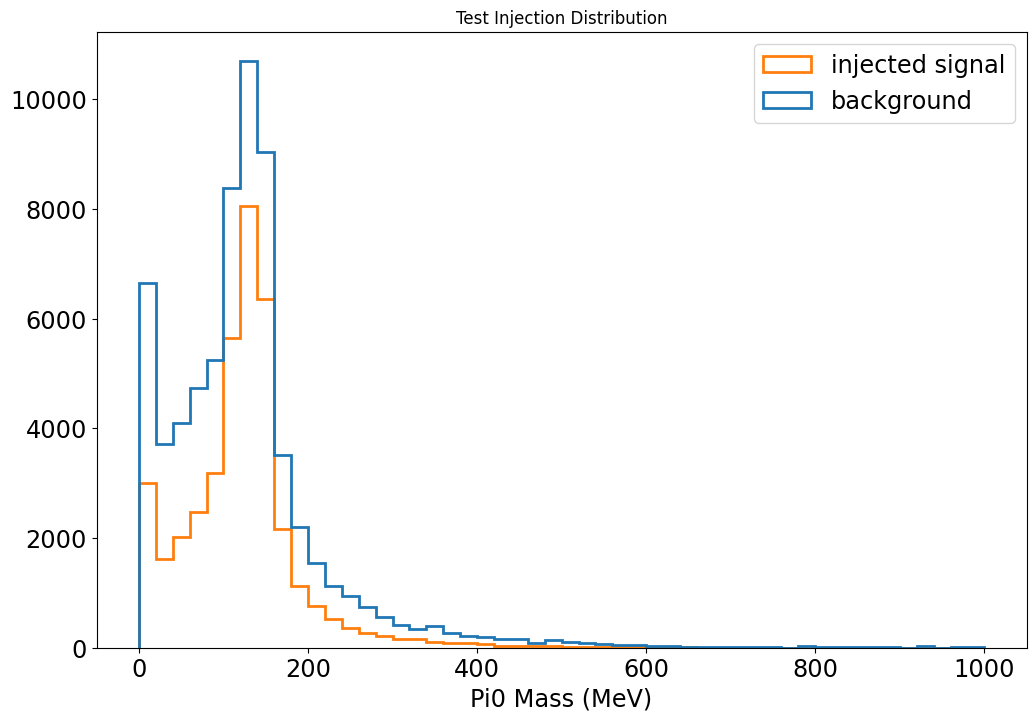

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.2663  (106523 / 400000)   0.6571  (262821)   0.0489  (19544)
Significance = 0.62402 (-0.40443  1.65601)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.1069  (42752 / 400000)   0.4385  (175390)   0.0102  (4088)
Significance = 1.24329 (0.15484  2.31817)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0263  (10535 / 400000)   0.2279  (91162)   0.0009  (356)
Significance = 1.93758 (0.74576  3.12468)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0025  (1015 / 400000)   0.0514  (20575)   0.0001  (24)
Significance = 2.80223 (1.631

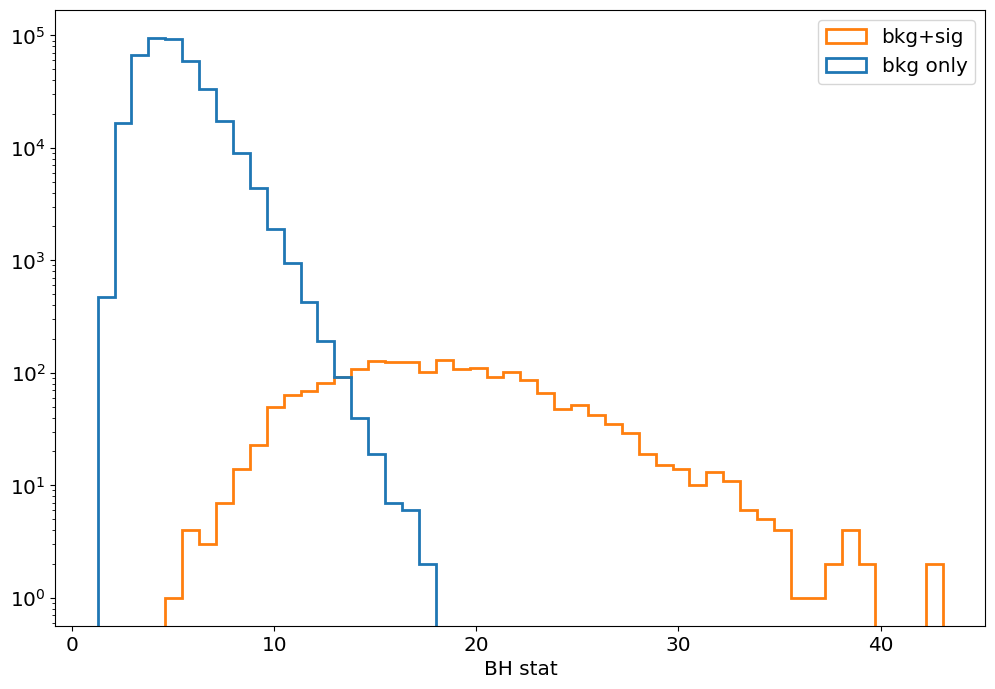

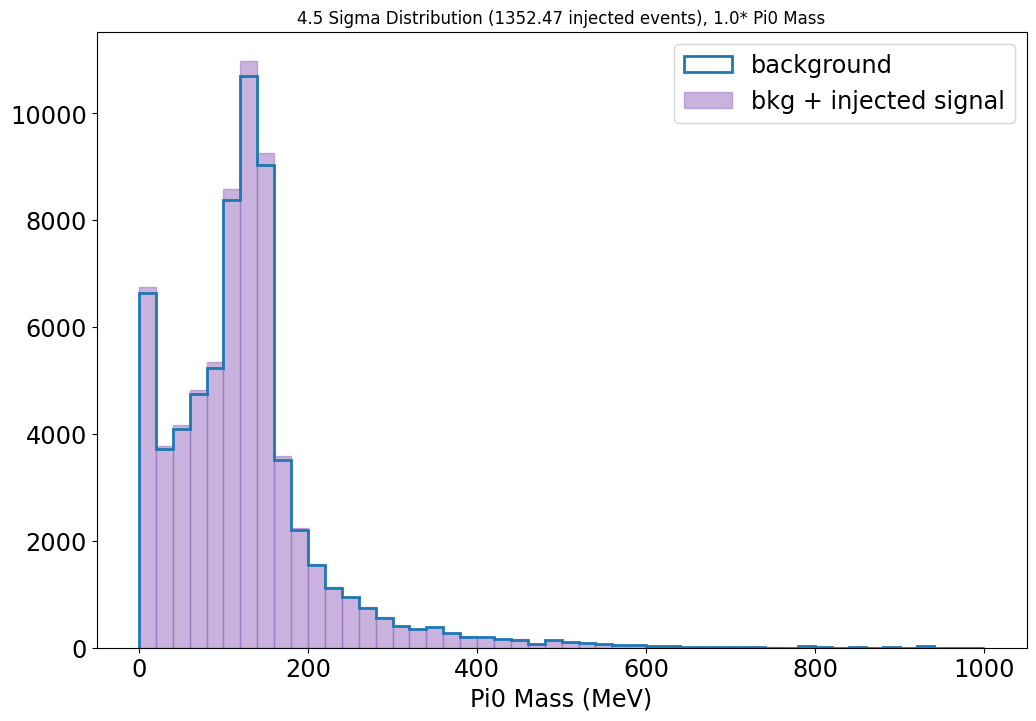

Scaling Mass by 1.2000000000000002


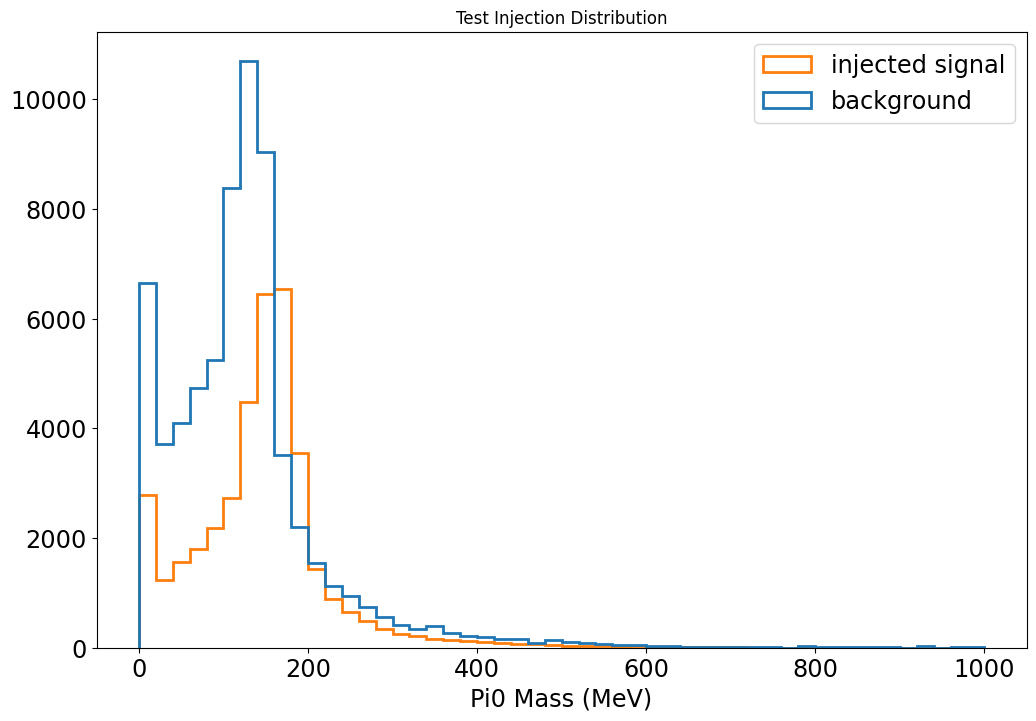

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.2183  (87305 / 400000)   0.5860  (234407)   0.0361  (14434)
Significance = 0.77807 (-0.21731  1.79804)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0699  (27942 / 400000)   0.3202  (128066)   0.0051  (2058)
Significance = 1.47687 (0.46724  2.56593)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0111  (4437 / 400000)   0.1148  (45908)   0.0004  (146)
Significance = 2.28719 (1.20154  3.37806)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0008  (315 / 400000)   0.0193  (7709)   0.0000  (5)
Significance = 3.16050 (2.06901  4

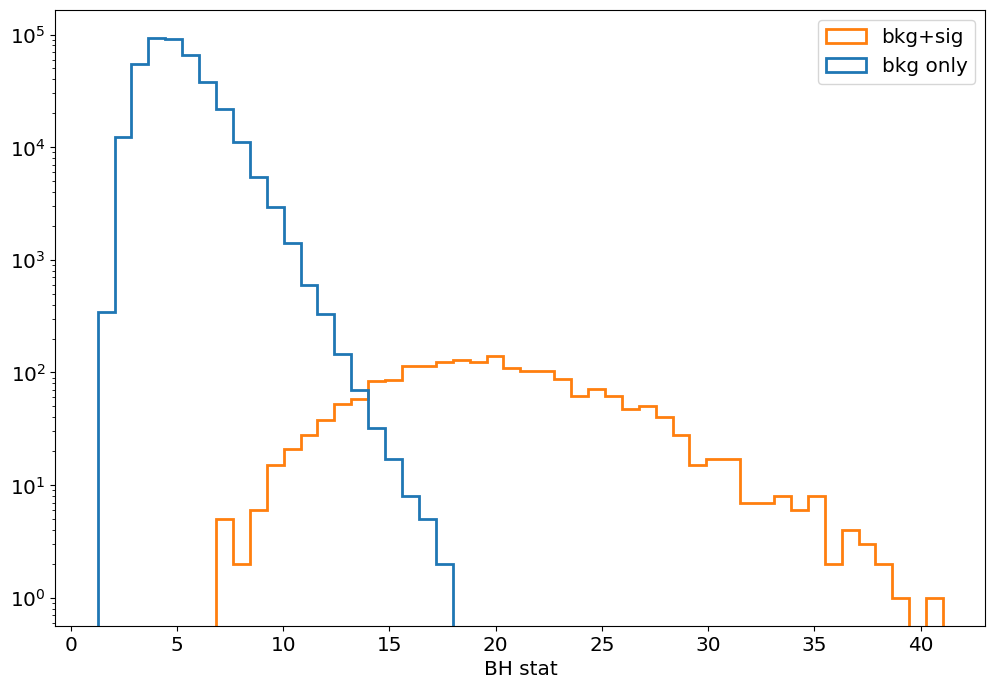

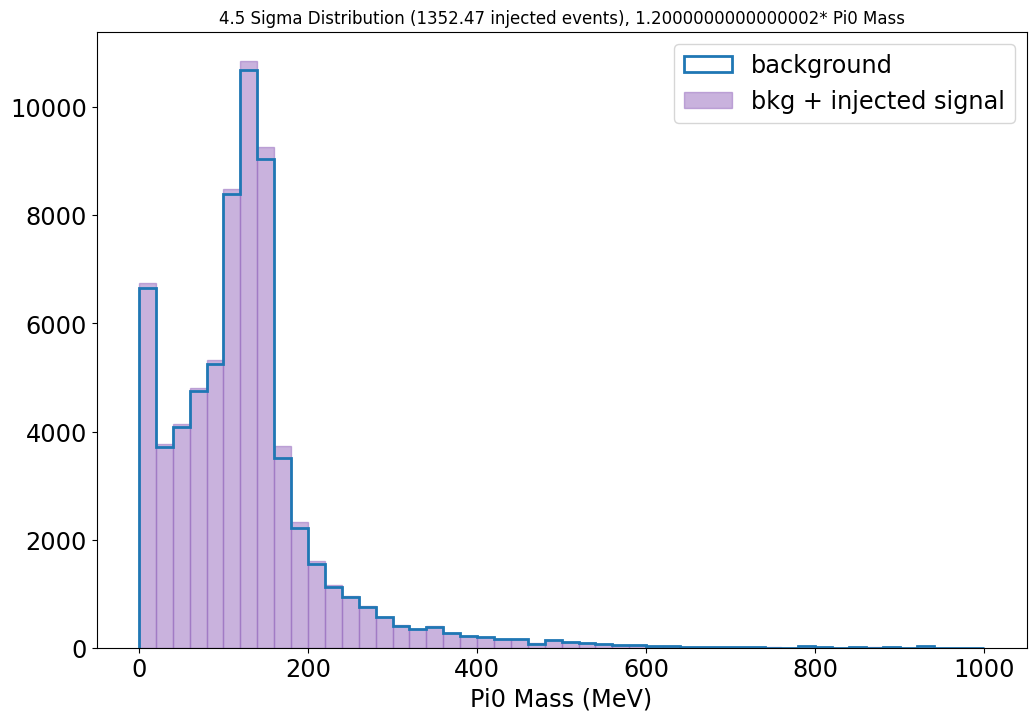

Scaling Mass by 1.4000000000000001


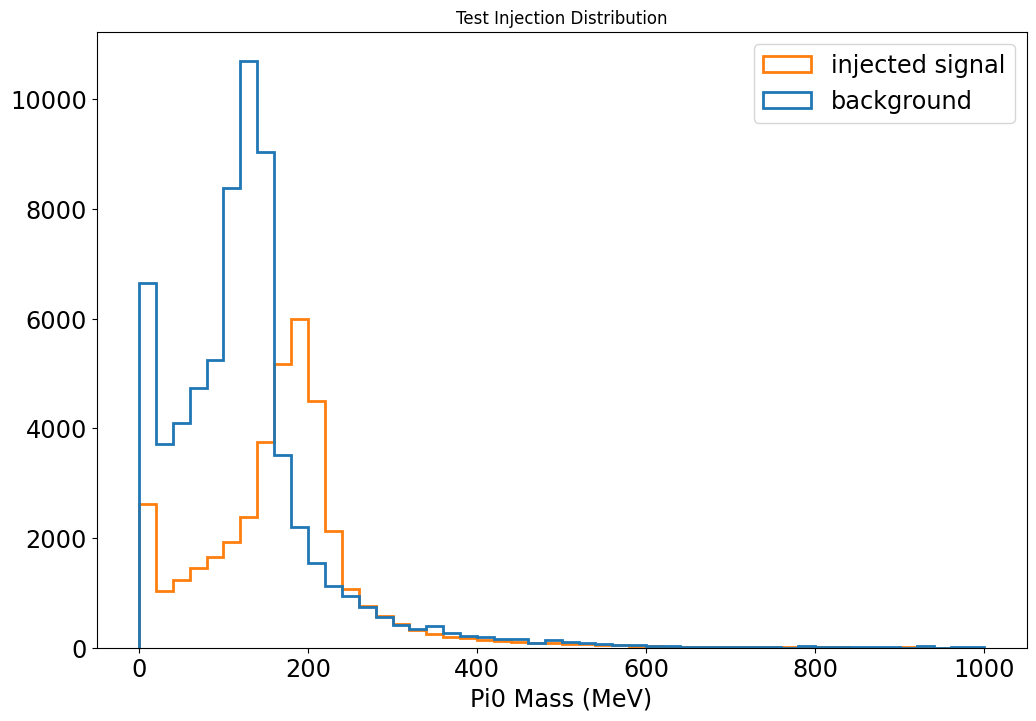

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.1367  (54688 / 400000)   0.4726  (189035)   0.0150  (5995)
Significance = 1.09517 (0.06877  2.17042)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0151  (6045 / 400000)   0.1534  (61369)   0.0007  (262)
Significance = 2.16713 (1.02186  3.21378)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0006  (260 / 400000)   0.0221  (8850)   0.0000  (2)
Significance = 3.21598 (2.01171  4.41717)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (4 / 400000)   0.0008  (325)   0.0000  (0)
Significance = 4.26489 (3.15138  4.56479)

   

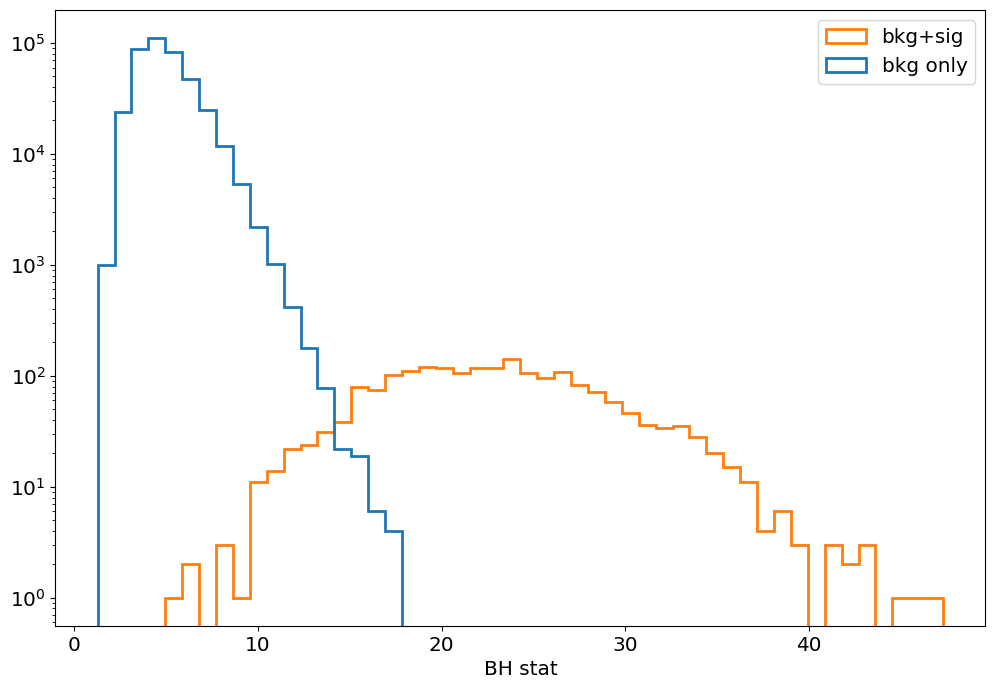

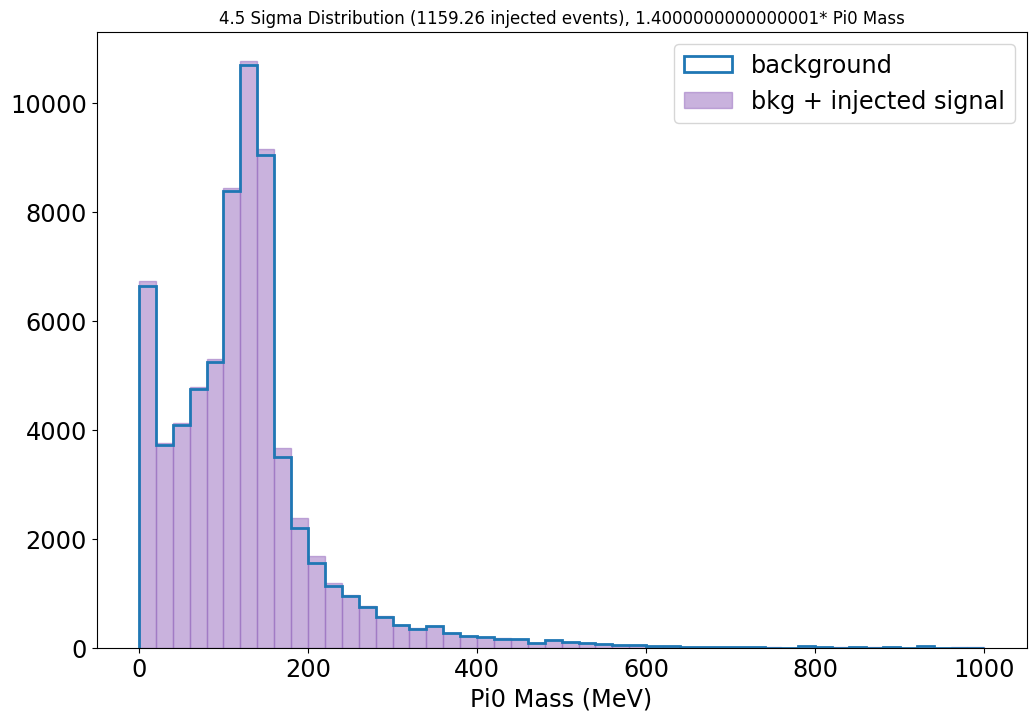

Scaling Mass by 1.6


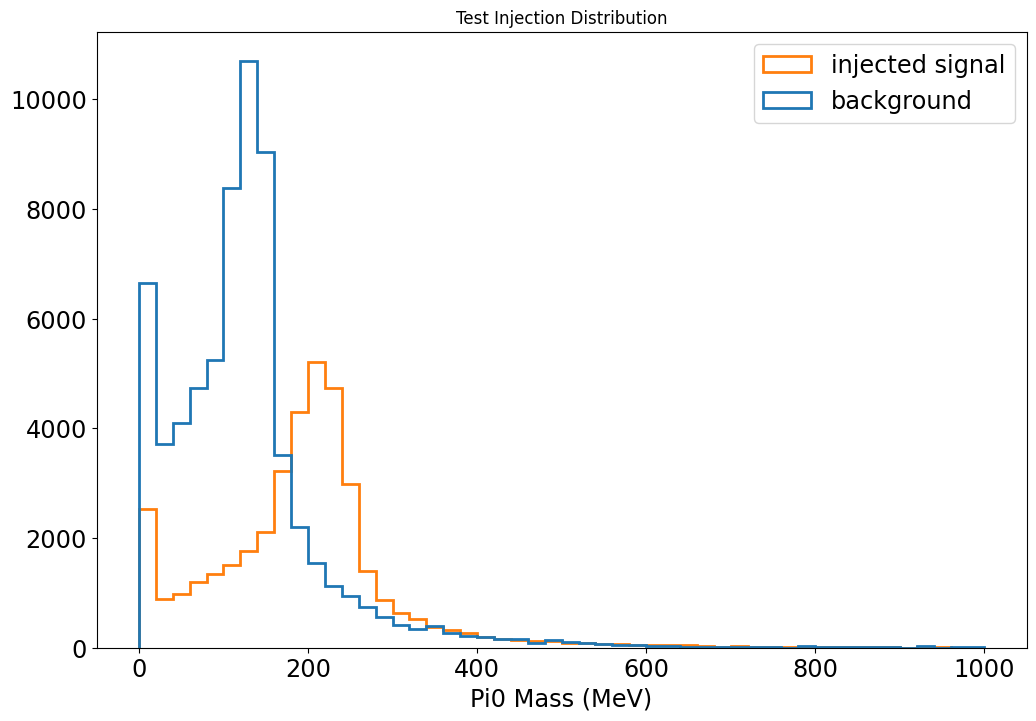

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0713  (28518 / 400000)   0.3322  (132876)   0.0048  (1926)
Significance = 1.46621 (0.43387  2.58884)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0027  (1076 / 400000)   0.0565  (22582)   0.0001  (23)
Significance = 2.78335 (1.58525  3.85655)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (14 / 400000)   0.0015  (607)   0.0000  (0)
Significance = 3.97629 (2.96417  4.56479)

   STEP 4 : signal strength = 0.025
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0000  (5)   0.0000  (0)
Significance = 4.56479 (4.21480  4.56479)

REACHED 

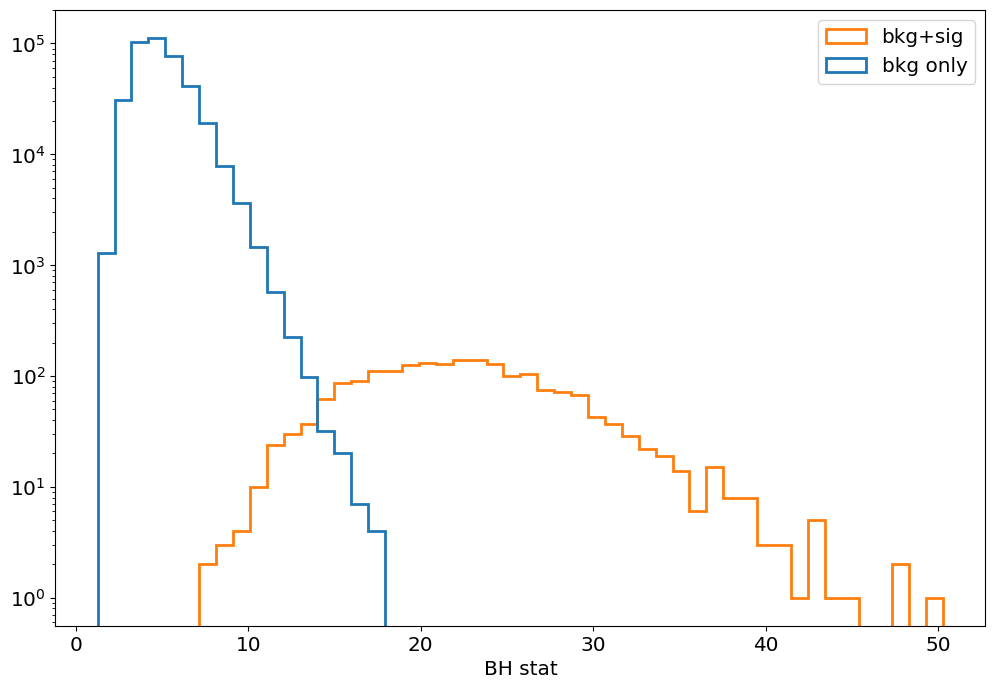

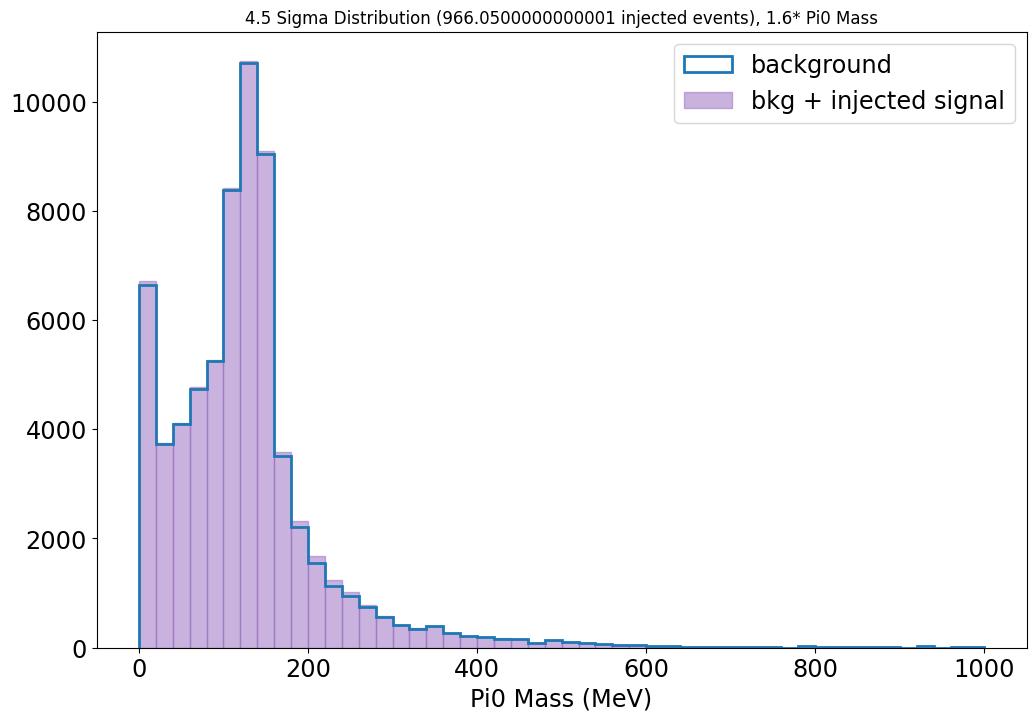

Scaling Mass by 1.8


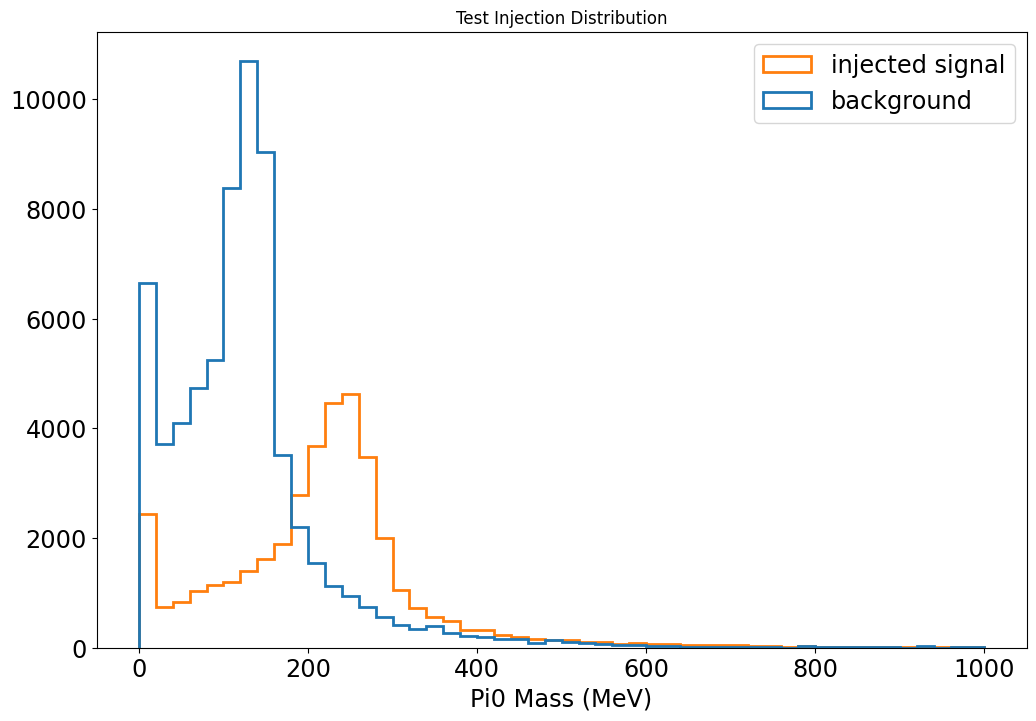

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0336  (13425 / 400000)   0.2616  (104629)   0.0018  (703)
Significance = 1.83084 (0.63851  2.91869)

   STEP 2 : signal strength = 0.015
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0004  (179 / 400000)   0.0151  (6033)   0.0000  (0)
Significance = 3.32161 (2.16792  4.56479)

   STEP 3 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0001  (45)   0.0000  (0)
Significance = 4.56479 (3.68916  4.56479)

REACHED SIGMA LIMIT
   Number of signal event injected : 772.84
   Signal strength : 0.0200

time=0:05:32.495207



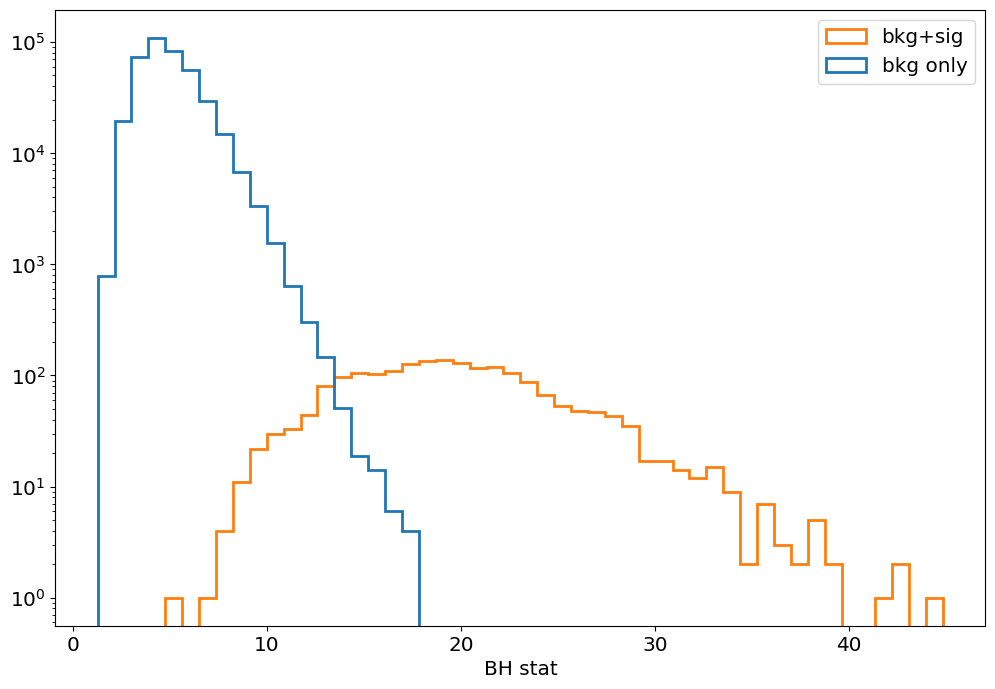

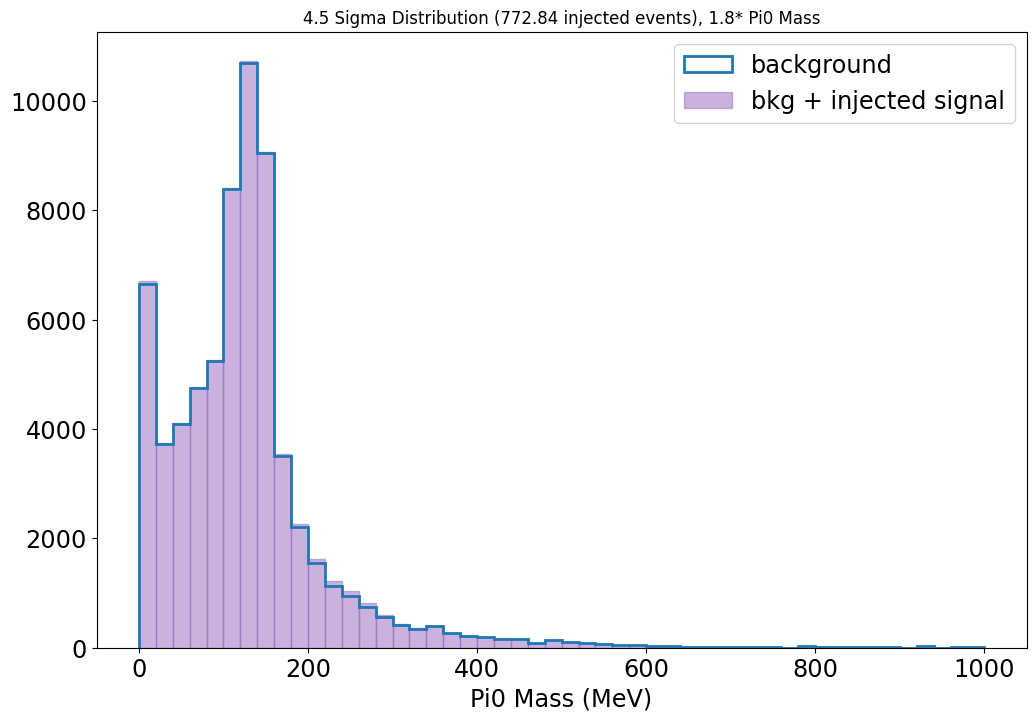

In [36]:
for s in range(1, 10):
    print (f"Scaling Mass by {s*0.2}")

    sig_scale = s * 0.2
    sig = [x * sig_scale for x in sig_raw]
    sig = np.array(sig)

    F = plt.figure(figsize=(12,8))
    plt.title("Test Injection Distribution")
    plt.hist(
        [bkg, sig],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "injected signal"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.xlabel('Pi0 Mass (MeV)', size='xx-large')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

    hunter.signal_exp = len(sig) #150 # Correspond the the real number of signal events generated when making the data
    print('####signal_inject call####')
    begin = datetime.now()
    hunter.signal_inject(sig,bkg,is_hist=hist_input)
    end = datetime.now()
    print(f'time={end - begin}')
    print('')    

    hunter.plot_inject(filename = '/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_sig_'+str(sig_scale)+'.png')

    F = plt.figure(figsize=(12,8))
    plt.hist(
        [hunter.t_ar[:hunter.npe],hunter.t_ar[hunter.npe:]],
        bins=50,
        histtype='step',
        lw=2,
        label=['bkg only', 'bkg+sig']
    )
    plt.legend(fontsize='x-large')
    plt.xlabel('BH stat', size='x-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.yscale('log')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/BHstat_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

    # Plot the signal injected distribution
    F = plt.figure(figsize=(12,8))
    plt.title("4.5 Sigma Distribution (" + str(hunter.signal_min) + " injected events), " + str(sig_scale) + "* Pi0 Mass")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(hunter.data_inject)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, hunter.data_inject, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='bkg + injected signal', color='C4', edgecolor='C4')
    #plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
    plt.hist(
            [bkg],
            bins=binnum,
            histtype="step",
            range=rang,
            label=["background"],
            linewidth=2,
            weights=[w_bkg],
        )
    plt.xlabel('Pi0 Mass (MeV)', size='xx-large')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)